# Policy Gradients and REINFORCE


Goal for the session:

Use the setting of last week to study Policy Gradients

Hédi Hadiji April 2023  

In [1]:
# Imports
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
from copy import deepcopy
import gymnasium as gym


import time
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print(f"python --version = {sys.version}")
print(f"torch.__version__ = {torch.__version__}")
print(f"np.__version__ = {np.__version__}")
print(f"gym.__version__ = {gym.__version__}")

python --version = 3.11.7 (tags/v3.11.7:fa7a6f2, Dec  4 2023, 19:24:49) [MSC v.1937 64 bit (AMD64)]
torch.__version__ = 2.2.2+cpu
np.__version__ = 1.26.2
gym.__version__ = 0.29.1


# Setting up the agent

### Baselines and utilities

In [4]:
class RandomAgent: 
    def __init__(self, observation_space, action_space):
        self.action_space = action_space
        return
    
    def get_action(self, state, **kwargs):
        return self.action_space.sample()
    
    def update(self, *data):
        pass

## Implementing the Agent

In [5]:
def eval_agent(agent, env, n_sim=10):
    """    
    Monte Carlo evaluation of the agent.

    Repeat n_sim times:
        * Run the agent policy until the environment reaches a terminal state (= one episode)
        * Compute the sum of rewards in this episode
        * Store the sum of rewards in the episode_rewards array.
    """
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        while not done: 
            action = agent.get_action(state, epsilon=0)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

In [ ]:
env = gym.make("MountainCar-v0", render_mode='rgb_array')
agent = RandomAgent(env.observation_space, env.action_space)

def run_one_episode(env, agent, display=True):
    display_env = deepcopy(env)
    done = False
    state, _ = display_env.reset()

    rewards = 0

    while not done:
        action = agent.get_action(state, epsilon=0)
        state, reward, done, _, _ = display_env.step(action)
        rewards += reward
        if display: 
            clear_output(wait=True)
            plt.imshow(display_env.render())
            plt.show()
    if display:
        display_env.close()
    print(f'Episode length {rewards}')
    
run_one_episode(env, agent, display=True)
print(f'Average over 5 runs : {np.mean(eval_agent(agent, env))}')

In [10]:
def train(env, agent, N_episodes, eval_every=100, reward_threshold=400, n_eval=10):
    total_time = 0
    for ep in range(N_episodes):
        done = False
        state, _ = env.reset()
        while not done: 
            action = agent.get_action(state)

            next_state, reward, terminated, truncated, _ = env.step(action)
            agent.update(state, action, reward, terminated, next_state)

            state = next_state

            done = terminated or truncated
            total_time += 1

        if ((ep+1)% eval_every == 0):
            mean_reward = np.mean(eval_agent(agent, env, n_sim=n_eval))
            print("episode =", ep+1, ", reward = ", mean_reward)
            if mean_reward >= reward_threshold:
                break
                
    return 

## Theory Recap

$$
    \nabla J(\theta) \approx \sum_{t=1}^T \gamma^t G_t \nabla \log \pi (A_t \mid S_t, \theta)
$$
where $\approx$ means that we estimate the LHS by the RHS


In this session, the policy is computed to be the softmax of the output of a neural network by 

$$
    \pi(a \vert s, \theta) = \frac{e^{h(s, a; \theta)}}{\sum_{a'} e^{h(s, a'; \theta)} }
$$
where $h(s, \cdot ; \theta)$ is the output of a neural network parameterized by $\theta$ when given the state $s$ as input.

In particular
$$
    \log \pi(a \vert s, \theta) = h(s, a; \theta) - \log \bigg( \sum_{a'} e^{h(s, a'; \theta)} \bigg)
$$

In [11]:
class Net(nn.Module):
    """
    Basic neural net.
    """

    def __init__(self, obs_size, hidden_size, n_actions):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions),
        )

    def forward(self, x):
        return self.net(x)

Question: Implement the get_action method

In [ ]:
class REINFORCE_SKELETON:
    def __init__(
        self,
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
    ):
        self.action_space = action_space
        self.observation_space = observation_space
        self.gamma = gamma

        self.episode_batch_size = episode_batch_size
        self.learning_rate = learning_rate

        self.reset()

    def update(self, state, action, reward, terminated, next_state):
        pass
    

    def get_action(self, state, epsilon=None):
        """
            QUESTION: 
        """
        state_tensor = torch.tensor(state).unsqueeze(0)
        with torch.no_grad():
            #Your code here
            pass


    def reset(self):
        hidden_size = 128

        obs_size = self.observation_space.shape[0]
        n_actions = self.action_space.n

        self.policy_net = Net(obs_size, hidden_size, n_actions)

        self.scores = []
        self.current_episode = []

        self.optimizer = optim.Adam(
            params=self.policy_net.parameters(), lr=self.learning_rate
        )

        self.n_eps = 0


In [12]:
class REINFORCE_SKELETON:
    def __init__(
        self,
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
    ):
        self.action_space = action_space
        self.observation_space = observation_space
        self.gamma = gamma

        self.episode_batch_size = episode_batch_size
        self.learning_rate = learning_rate

        self.reset()

    def update(self, state, action, reward, terminated, next_state):
        pass
    

    def get_action(self, state, epsilon=None):
        """
            SOLUTION
        """
        state_tensor = torch.tensor(state).unsqueeze(0)
        with torch.no_grad():
            unn_log_probs = self.policy_net.forward(state_tensor).numpy()[0]
            p = np.exp(unn_log_probs - np.min(unn_log_probs))
            p = p /  np.sum(p)
            return np.random.choice(np.arange(self.action_space.n), p=p)


    def reset(self):
        hidden_size = 128

        obs_size = self.observation_space.shape[0]
        n_actions = self.action_space.n

        self.policy_net = Net(obs_size, hidden_size, n_actions)

        self.scores = []
        self.current_episode = []

        self.optimizer = optim.Adam(
            params=self.policy_net.parameters(), lr=self.learning_rate
        )

        self.n_eps = 0




You should have an agent that runs but does not learn

In [68]:
action_space = env.action_space
observation_space = env.observation_space
gamma = 0.99
episode_batch_size = 1
learning_rate = 1e-2

agent = REINFORCE_SKELETON(action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,)

run_one_episode(env, agent, display=True)

KeyboardInterrupt: 

Time to implement the gradient updates. 

Remember you want to take 
$$
    \theta \leftarrow \theta + \eta_t \sum_{t=1}^T \gamma^t G_t \nabla_{\theta} \log \pi(A_t \vert S_t, \theta)
$$



In [69]:
class REINFORCE(REINFORCE_SKELETON):
    
    def _gradient_returns(self, rewards, gamma):
        """
        Turns a list of rewards into the list of returns * gamma**t
        """
        G = 0
        returns_list = []
        T = len(rewards)
        full_gamma = np.power(gamma, T)
        for t in range(T):
            G = rewards[T-t-1] + gamma * G
            full_gamma /= gamma
            returns_list.append(full_gamma * G)
        return torch.tensor(returns_list[::-1])#, dtype=torch.float32)

    def update(self, state, action, reward, terminated, next_state):
        """
        ** Question **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated: 
            self.n_eps += 1
            # Your code here

            


In [8]:
class REINFORCE(REINFORCE_SKELETON):
    
    def _gradient_returns(self, rewards, gamma):
        """
        Turns a list of rewards into the list of returns * gamma**t
        """
        G = 0
        returns_list = []
        T = len(rewards)
        full_gamma = np.power(gamma, T)
        for t in range(T):
            G = rewards[T-t-1] + gamma * G
            full_gamma /= gamma
            returns_list.append(full_gamma * G)
        return torch.tensor(returns_list[::-1])#, dtype=torch.float32)

    def update(self, state, action, reward, terminated, next_state):
        """
        ** SOLUTION **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated: 
            self.n_eps += 1

            states, actions, rewards = tuple(
                [torch.cat(data) for data in zip(*self.current_episode)]
            )

            current_episode_returns = self._gradient_returns(rewards, self.gamma)

            unn_log_probs = self.policy_net.forward(states)
            log_probs = unn_log_probs - torch.log(torch.sum(torch.exp(unn_log_probs), dim=1)).unsqueeze(1)
            score = torch.dot(log_probs.gather(1, actions).squeeze(), current_episode_returns).unsqueeze(0)
            self.scores.append(score)
            self.current_episode = []

            self.optimizer.zero_grad()
            full_neg_score = -score
            full_neg_score.backward()
            self.optimizer.step()

In [13]:
env = gym.make("MountainCar-v0", render_mode='rgb_array')

action_space = env.action_space
observation_space = env.observation_space

gamma = .99
episode_batch_size = 10
learning_rate = 1e-2

agent = REINFORCE(
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
        )
N_episodes = 1000


print("mean reward before training = ", np.mean(eval_agent(agent, env, 200)))
# Run the training loop
train(env, agent, N_episodes, eval_every=50,)

# Evaluate the final policy
print("mean reward after training = ", np.mean(eval_agent(agent, env, 200)))

mean reward before training =  -200.0
episode = 50 , reward =  -200.0
episode = 100 , reward =  -200.0
episode = 150 , reward =  -200.0
episode = 200 , reward =  -200.0
episode = 250 , reward =  -200.0
episode = 300 , reward =  -200.0
episode = 350 , reward =  -200.0
episode = 400 , reward =  -200.0
episode = 450 , reward =  -200.0
episode = 500 , reward =  -200.0
episode = 550 , reward =  -200.0
episode = 600 , reward =  -200.0
episode = 650 , reward =  -200.0
episode = 700 , reward =  -200.0
episode = 750 , reward =  -200.0
episode = 800 , reward =  -200.0
episode = 850 , reward =  -200.0
episode = 900 , reward =  -200.0
episode = 950 , reward =  -200.0
episode = 1000 , reward =  -200.0
mean reward after training =  -200.0


In practice, one way to stabilize the updates is to wait a few episodes before doing the updates in batch. Implement this.

In [ ]:
class REINFORCEBatch(REINFORCE):
    def update(self, state, action, reward, terminated, next_state):
        """
        ** QUESTION **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated:
            self.n_eps += 1
            # Your code here

            if (self.n_eps % self.episode_batch_size)==0:
               # Your code here
               pass


In [14]:
class REINFORCEBatch(REINFORCE):
    def update(self, state, action, reward, terminated, next_state):
        """
        ** SOLUTION **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated:
            self.n_eps += 1

            states, actions, rewards = tuple(
                [torch.cat(data) for data in zip(*self.current_episode)]
            )

            current_episode_returns = self._gradient_returns(rewards, self.gamma)

            unn_log_probs = self.policy_net.forward(states)
            log_probs = unn_log_probs - torch.log(torch.sum(torch.exp(unn_log_probs), dim=1)).unsqueeze(1)
            self.scores.append(torch.dot(log_probs.gather(1, actions).squeeze(), current_episode_returns).unsqueeze(0))
            self.current_episode = []

            if (self.n_eps % self.episode_batch_size)==0:
                self.optimizer.zero_grad()
                full_neg_score = - torch.cat(self.scores).sum() / self.episode_batch_size
                full_neg_score.backward()
                self.optimizer.step()
                
                self.scores = []


In [15]:
env = gym.make("CartPole-v1", render_mode='rgb_array')

action_space = env.action_space
observation_space = env.observation_space

gamma = .95
episode_batch_size = 30
learning_rate = 1e-2

agent = REINFORCEBatch(
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
        )
N_episodes = 3000


print("mean reward before training = ", np.mean(eval_agent(agent, env, 200)))
# Run the training loop
train(env, agent, N_episodes, eval_every=50,)

# Evaluate the final policy
print("mean reward after training = ", np.mean(eval_agent(agent, env, 200)))
print(eval_agent(agent, env, 10))

mean reward before training =  20.605
episode = 50 , reward =  18.6
episode = 100 , reward =  29.2
episode = 150 , reward =  37.5
episode = 200 , reward =  43.0
episode = 250 , reward =  41.3
episode = 300 , reward =  50.0
episode = 350 , reward =  66.7
episode = 400 , reward =  61.7
episode = 450 , reward =  45.1
episode = 500 , reward =  36.7
episode = 550 , reward =  40.1
episode = 600 , reward =  61.0
episode = 650 , reward =  63.4
episode = 700 , reward =  68.3
episode = 750 , reward =  86.3
episode = 800 , reward =  96.5
episode = 850 , reward =  83.8
episode = 900 , reward =  84.1
episode = 950 , reward =  83.4
episode = 1000 , reward =  75.6
episode = 1050 , reward =  69.2
episode = 1100 , reward =  89.2
episode = 1150 , reward =  70.4
episode = 1200 , reward =  65.3
episode = 1250 , reward =  66.6
episode = 1300 , reward =  70.4
episode = 1350 , reward =  97.6
episode = 1400 , reward =  130.9
episode = 1450 , reward =  207.1
episode = 1500 , reward =  166.6
episode = 1550 , re

Baseline:

Remember we can add a baseline to reduce the variance. The simplest baseline one can take it use 
$$
    b(S_t) \equiv \bar G_T = \frac{1}{T} \sum_{t=1}^T G_t
$$
which amount to subtracting the mean of the returns in the estimation to use 

$$
        \theta \leftarrow \theta + \eta_t \sum_{t=1}^T \gamma^t (G_t - \bar G_T) \nabla_{\theta} \log \pi(A_t \vert S_t, \theta)
$$

In [53]:
class REINFORCEBaseline(REINFORCE):
    def update(self, state, action, reward, terminated, next_state):
        """
        ** QUESTION **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated:
            # Your code here
            pass

In [55]:
class REINFORCEBaseline(REINFORCE):
    def update(self, state, action, reward, terminated, next_state):
        """
        ** SOLUTION **
        """
        
        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated:
            self.n_eps += 1

            states, actions, rewards = tuple(
                [torch.cat(data) for data in zip(*self.current_episode)]
            )

            current_episode_returns = self._gradient_returns(rewards, self.gamma)
            current_episode_returns = (current_episode_returns - current_episode_returns.mean())

            unn_log_probs = self.policy_net.forward(states)
            log_probs = unn_log_probs - torch.log(torch.sum(torch.exp(unn_log_probs), dim=1)).unsqueeze(1)
            self.scores.append(torch.dot(log_probs.gather(1, actions).squeeze(), current_episode_returns).unsqueeze(0))
            self.current_episode = []

            if (self.n_eps % self.episode_batch_size)==0:
                self.optimizer.zero_grad()
                full_neg_score = - torch.cat(self.scores).sum() / self.episode_batch_size
                full_neg_score.backward()
                self.optimizer.step()
                
                self.scores = []


In [59]:
env = gym.make("CartPole-v1", render_mode='rgb_array')

action_space = env.action_space
observation_space = env.observation_space

gamma = .95
episode_batch_size = 10
learning_rate = 1e-2

agent = REINFORCEBaseline(
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
        )
N_episodes = 300


print("mean reward before training = ", np.mean(eval_agent(agent, env, 200)))
# Run the training loop
train(env, agent, N_episodes, eval_every=50,)

# Evaluate the final policy
print("mean reward after training = ", np.mean(eval_agent(agent, env, 200)))

mean reward before training =  23.855
episode = 50 , reward =  45.3
episode = 100 , reward =  88.1
episode = 150 , reward =  58.7
episode = 200 , reward =  112.7
episode = 250 , reward =  184.2
episode = 300 , reward =  197.1
mean reward after training =  212.185


In [58]:
class REINFORCE:
    def __init__(
        self,
        action_space,
        observation_space,
        gamma,
        episode_batch_size,
        learning_rate,
    ):
        self.action_space = action_space
        self.observation_space = observation_space
        self.gamma = gamma

        self.episode_batch_size = episode_batch_size
        self.learning_rate = learning_rate

        self.reset()

    def update(self, state, action, reward, terminated, next_state):
        """
        ** SOLUTION **
        """

        self.current_episode.append((
            torch.tensor(state).unsqueeze(0),
            torch.tensor([[action]], dtype=torch.int64),
            torch.tensor([reward]),
        )
        )

        if terminated:
            self.n_eps += 1

            states, actions, rewards = tuple(
                [torch.cat(data) for data in zip(*self.current_episode)]
            )

            current_episode_returns = self._gradient_returns(rewards, self.gamma)
            current_episode_returns = (current_episode_returns - current_episode_returns.mean())

            unn_log_probs = self.policy_net.forward(states)
            log_probs = unn_log_probs - torch.log(torch.sum(torch.exp(unn_log_probs), dim=1)).unsqueeze(1)
            self.scores.append(torch.dot(log_probs.gather(1, actions).squeeze(), current_episode_returns).unsqueeze(0))
            self.current_episode = []

            if (self.n_eps % self.episode_batch_size)==0:
                self.optimizer.zero_grad()
                full_neg_score = - torch.cat(self.scores).sum() / self.episode_batch_size
                full_neg_score.backward()
                self.optimizer.step()
                
                self.scores = []

        return  
    
    def _gradient_returns(self, rewards, gamma):
        """
        Turns a list of rewards into the list of returns * gamma**t
        """
        G = 0
        returns_list = []
        T = len(rewards)
        full_gamma = np.power(gamma, T)
        for t in range(T):
            G = rewards[T-t-1] + gamma * G
            full_gamma /= gamma
            returns_list.append(full_gamma * G)
        return torch.tensor(returns_list[::-1])#, dtype=torch.float32)

    def get_action(self, state, epsilon=None):
        """
        Return action according to an epsilon-greedy exploration policy
        """
        state_tensor = torch.tensor(state).unsqueeze(0)
        with torch.no_grad():
            unn_log_probs = self.policy_net.forward(state_tensor).numpy()[0]
            p = np.exp(unn_log_probs - np.min(unn_log_probs))
            p = p /  np.sum(p)
            return np.random.choice(np.arange(self.action_space.n), p=p)


    def reset(self):
        hidden_size = 128

        obs_size = self.observation_space.shape[0]
        n_actions = self.action_space.n

        self.policy_net = Net(obs_size, hidden_size, n_actions)

        self.scores = []
        self.current_episode = []

        self.optimizer = optim.Adam(
            params=self.policy_net.parameters(), lr=self.learning_rate
        )

        self.n_eps = 0


In [33]:
print("Rewards after training = ", eval_agent(agent, env, n_sim = 10))
print("Rewards Random = ", eval_agent(RandomAgent(observation_space, action_space), env, n_sim = 10))

Rewards after training =  [500. 500. 500. 500. 500. 500. 500. 500. 500. 500.]
Rewards Random =  [14. 17. 24. 16. 17. 15. 12. 25. 13. 19.]


In [18]:
# Some 

# a = np.eye(3)
# for i in range(3): a[i, i] = i

# unn_log_probs = torch.tensor(a)#.unsqueeze(0)
# #print(unn_log_probs)
# print(unn_log_probs.shape)
# print(torch.log(torch.sum(torch.exp(unn_log_probs), dim=[1])).unsqueeze(1).shape)
# log_probs = unn_log_probs - torch.log(torch.sum(torch.exp(unn_log_probs), dim=1)).unsqueeze(1)

# print(unn_log_probs)
# print(torch.log(torch.sum(torch.exp(unn_log_probs), dim=[1])).unsqueeze(1))
# print(log_probs)

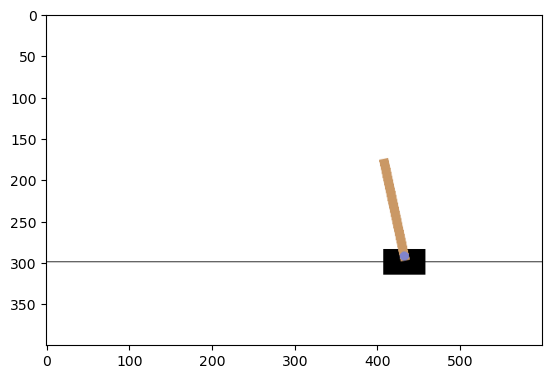

Episode length 218.0


In [153]:
run_one_episode(env, agent, display=True)